In [73]:
import urllib
import urllib2
import webbrowser

url = "http://duckduckgo.com/html"
data = urllib.urlencode({'q': 'Python'})
results = urllib2.urlopen(url, data)
with open("results.html", "w") as f:
    f.write(results.read())

webbrowser.open("results.html")

ModuleNotFoundError: No module named 'urllib2'

In [ ]:
import requests

url = "http://duckduckgo.com/html"
payload = {'q':'python'}
r = requests.post(url, payload)
data=r.content
with open("requests_results.html", "wb") as f:
    f.write(data)

In [ ]:
import mechanize

url = "http://duckduckgo.com/html"
br = mechanize.Browser()
br.set_handle_robots(False) # ignore robots
br.open(url)
br.select_form(name="x")
br["q"] = "python"
res = br.submit()
content = res.read()
with open("mechanize_results.html", "wb") as f:
    f.write(content)

In [ ]:
import urllib
import urllib2

url = 'http://stackoverflow.com/'

# Prepare the data
values = {'q' : '[python]'}
data = urllib.urlencode(values)

# Send HTTP POST request
req = urllib2.Request(url, data)
response = urllib2.urlopen(req)

html = response.read()

# Print the result
print(html)

In [74]:
import requests

data= {
    'q': '[python]'
    }
r = requests.get('http://stackoverflow.com', data=data)

print (r.text)

<!DOCTYPE html>


    <html class="html__responsive html__unpinned-leftnav">

    <head>

        <title>Stack Overflow - Where Developers Learn, Share, &amp; Build Careers</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/img/favicon.ico?v=4f32ecc8f43d">
        <link rel="apple-touch-icon image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/img/apple-touch-icon.png?v=c78bd457575a">
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">
        <meta name="description" content="Stack Overflow is the largest, most trusted online community for developers to learn, share​ ​their programming ​knowledge, and build their careers."/>
        <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">


        <meta property="og:type" content= "website" />
        <meta property="og:url" content="https://stackoverflow.com/"/>
  

In [75]:
r=requests.get('https://api.github.com/user', auth=('user', 'pass'))
r.status_code

403

In [ ]:
r.headers['content-type']

In [ ]:
r.text

In [76]:
import requests

with requests.Session() as c:
    url='https://community.cloud.databricks.com/login.html'
    USER='amitagrawal08@gmail.com'
    PASS='Idea@1234'
    c.get(url)
    login_data=dict(j_username=USER, j_password=PASS)
    c.post(url, data=login_data, headers={"Referer": "https://community.cloud.databricks.com/"})
    page=c.get("https://community.cloud.databricks.com/?o=6510174403664609")
    print(page.content)

b'<!DOCTYPE html>\n\n<html>\n<head>\n    <meta charset="utf-8"/>\n    <meta http-equiv="Content-Language" content="en"/>\n    <title>Databricks - Sign In</title>\n    <meta name="viewport" content="width=960">\n    <link rel="stylesheet" href="/login/bootstrap.min.css">\n    <link rel="icon" type="image/png" href="login/favicon.ico" />\n\n    <meta http-equiv="content-type" content="text/html; charset=UTF8">\n<link rel="shortcut icon" href="favicon.ico"><link href="login/login.5ef3eab2.css" rel="stylesheet"></head>\n<body>\n<div id="login-page"></div>\n<script type="text/javascript" src="login/login.00087faf.js"></script></body>\n</html>\n'


In [77]:
import mechanize

url = "https://community.cloud.databricks.com/login.html"
br = mechanize.Browser()
br.set_handle_robots(False) # ignore robots
br.open(url)
#br.select_form(name="x")
#br["q"] = "python"
#res = br.submit()
#content = res.read()
#with open("mechanize_results.html", "wb") as f:
#    f.write(content)

<response_seek_wrapper at 0x2abcb2dbd30 whose wrapped object = <closeable_response at 0x2abcb2dbc88 whose fp = <_io.BufferedReader>>>

In [78]:
import re
import config
from robobrowser import RoboBrowser

br=RoboBrowser(history=True,parser='html.parser')
"https://community.cloud.databricks.com/login.html"
br.open(url)
form=br.get_link() ## action="/login/databricks_ce_icon.svg"
form["login-email"]=config.DATABRICKS_USERNAME
form["login-password"]=config.DATABRICKS_PASSWORD
form["x-csrf-token"] = '4438ec26-5602-40fd-a233-93594847c28a'
br.session.headers['Referer'] = 'https://community.cloud.databricks.com/?o=6510174403664609'
br.submit_form(form)
print(str(br.select))
print(form)
print(br.parsed)

TypeError: 'NoneType' object does not support item assignment

In [79]:
import re
from robobrowser import RoboBrowser

# Browse to Rap Genius
browser = RoboBrowser(history=True)
browser.open('http://rapgenius.com/')

# Search for Queen
form = browser.get_form(action='/search')
form                # <RoboForm q=>
form['q'].value = 'song'
browser.submit_form(form)
t=browser.get_form()
print(t)

C:\Users\eamiagr\AppData\Local\Continuum\anaconda3\lib\site-packages\robobrowser\browser.py:40: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 40 of the file C:\Users\eamiagr\AppData\Local\Continuum\anaconda3\lib\site-packages\robobrowser\browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  features=self.browser.parser,


None


In [ ]:
import re
import config
from robobrowser import RoboBrowser

url = 'https://community.cloud.databricks.com/login.html'  
browser = RoboBrowser(history=False ,parser='lxml')  
browser.open(url=url)  

sign_up = browser.get_form(id='login-email', class_ ='login-form')
sign_up['login-email'].value = config.DATABRICKS_USERNAME

opens = browser.submit_form(sign_up)
print(opens.parsed)

In [ ]:
import mechanize

url = "https://community.cloud.databricks.com/login.html"
br = mechanize.Browser()
br.set_handle_robots(False) # ignore robots
br.open(url)
br.select_form()
br["j_username"] = config.DATABRICKS_USERNAME
br["j_password"] = config.DATABRICKS_PASSWORD
res = br.submit()
content = res.read()



In [ ]:
import mechanicalsoup

url = "https://community.cloud.databricks.com/login.html"
browser = mechanicalsoup.Browser()
login_page = browser.get(url)
login_form = login_page.soup.select(".form-signin")[0]

login_page.find(attrs={"name": "j_username"})['value'] = config.DATABRICKS_USERNAME
login_page.find(attrs={"name": "j_password"})['value'] = config.DATABRICKS_PASSWORD

page2 = browser.submit(login_form, url)
print(str(page2.text))

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import os

url='https://community.cloud.databricks.com/login.html'
USER='amitagrawal08@gmail.com'
PASS='Idea@1234'

#driver = webdriver.Chrome(executable_path=r"C:\Users\eamiagr\Downloads\chromedriver1.exe")
chrome_options = webdriver.ChromeOptions(); 
#chrome_options.add_experimental_option("excludeSwitches", ['enable-automation']);
#chrome_options.add_experimental_option("useAutomationExtension", false)
#chrome_options.add_experimental_option("excludeSwitches",Collections.singletonList("enable-automation"))
chrome_options.add_argument("disable-infobars")
chrome_options.add_argument("disable-extensions");
driver = webdriver.Chrome(executable_path=r"C:\Users\eamiagr\Downloads\chromedriver1.exe", options=chrome_options); 
## ChromeDriverManager().install()
## C:\Users\eamiagr\AppData\Local\Continuum\anaconda3\Lib\site-packages\chromedriver")
## C:\Users\eamiagr\Downloads\chromedriver.exe")
## os.path.abspath("chromedriver.exe"
driver.get(url)
driver.find_element_by_id('login-email').send_keys(USER)
driver.find_element_by_id('login-password').send_keys(PASS)
driver.find_element_by_id('login-password').send_keys('\n')
#driver.find_element_by_class_name('button.signin btn btn-primary btn-large').click()
#driver.find_element(By.CLASS_NAME, 'signin btn btn-primary btn-large').click()
#driver.find_element_by_css_selector("button.signin btn btn-primary btn-large").click()
#driver.find_element_by_xpath("//*[@class='signin btn btn-primary btn-large']") 
#driver.findElement(By.className("signin btn btn-primary"));
#driver.find_elements_by_css_selector("Sign In").click();

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
headers={
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    #'Cookie': 'workspace-url=community.cloud.databricks.com; csrf-token=; JSESSIONID=auth-auth-ce-6dbb65dbf6-dvm9d2r5lgefgzuw10de4zjs71xpi.auth-auth-ce-6dbb65dbf6-dvm9d',
    'Referer': 'https://community.cloud.databricks.com/login.html',
    #'Sec-Fetch-Mode': 'navigate',
    #'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
}

In [ ]:
header={
    'Accept-Language': 'en-US,en;q=0.9',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer': 'https://community.cloud.databricks.com/login.html',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:60.0) Gecko/20100101 Firefox/60.0'
}

In [ ]:
login_data={
    'j_username' : 'amitagrawal08@gmail.com',
    'j_password' : 'Idea@1234'
}

In [ ]:
with requests.Session() as s:
    url="https://community.cloud.databricks.com/login.html"
    USER="amitagrawal08@gmail.com"
    PASS="Idea@1234"
    r = s.get(url, headers=headers)
    #print(r.content)
    soup=BeautifulSoup(r.content, 'html5lib')
    #print(soup)
    r=s.post(url, data = login_data, headers= header)
    print(r.ok)
    print(r.status_code)
    print(r.content)
    #requests.post?

In [ ]:
import requests
from bs4 import BeautifulSoup

headers={
    'Referer': 'https://economictimes.indiatimes.com/login.cms',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
}

In [ ]:
login_data={
    'email' : 'amitagrawal08@gmail.com',
    'lg_login' : 'Continue'
}
password_data={
    'password' : 'Idea@12345',
    'lg_login' : 'Continue'
}

In [ ]:
with requests.Session() as s:
    url="https://economictimes.indiatimes.com/login.cms"
    USER="amitagrawal08@gmail.com"
    PASS="Idea@12345"
    r = s.get(url, headers = headers)
    soup=BeautifulSoup(r.content, 'html5lib')
    
    click1 = soup.find('div', attrs={'class':'lg_obtn clr lg_sso'}).text
    t=s.post(url, data = click1, headers = headers)
    soup1=BeautifulSoup(t.content, 'html5lib')
    #print(soup1)

    #login_data['lg_login'] = soup1.find('input', attrs={'onclick': 'objUserLogin.loginIdCheck();'})['value']
    a=s.post(url, data = login_data, headers = headers)
    soup2=BeautifulSoup(a.content, 'html5lib')
    #print(soup2)
    
    #password_data['lg_login'] = soup2.find('input', attrs={'onclick': 'objUserLogin.login();'})['value']
    b=s.post(url, data = password_data, headers = headers)
    soup3=BeautifulSoup(b.content, 'html5lib')
    #print(soup3)
    
    page= s.get(url, headers = headers)
    soup4=BeautifulSoup(page.content, 'html5lib')
    print(page.content) 



    #<div class="lg_obtn clr lg_sso"><span class="lg_sprite lg_icon"></span><span>Continue with Email or Mobile</span></div>

In [ ]:
    
    login_data['lg_login'] = soup1.find('input', attrs={'value': 'Continue'})['value']
    
    a=s.post(url, data = login_data, headers=header)
    soup2=BeautifulSoup(a.content, 'html5lib')
    print(soup2)
    password_data['lg_login'] = soup2.find('input', attrs={'value': 'Continue'})['value']
    b=s.post(url, data = password_data, headers=header)
    soup3=BeautifulSoup(b.content, 'html5lib')
    print(soup3)
    out = soup3.get(url, headers=header)
    print(out)
    #r=s.post(url, data = login_data, headers=header)
    #print(r.ok)
    #print(r.status_code)
    #print(r.content)
    #r=s.post(url, data = click1, headers=header)
    #requests.post?
    

In [ ]:
import requests
from bs4 import BeautifulSoup

headers={
    #'referer': 'https://googleads.g.doubleclick.net/pagead/ads?client=ca-pub-3904646448982256&output=html&h=90&twa=1&adk=193763468&adf=683844098&w=316&fwrn=4&fwrnh=100&lmt=1569504654&guci=2.2.0.0.2.2.0.0&ad_type=image&format=316x90&url=https%3A%2F%2Fwww.equitybulls.com%2F&flash=0&fwr=0&rh=90&rw=316&wgl=1&adsid=NT&dt=1569504653552&bpp=43&bdt=375&fdt=478&idt=478&shv=r20190924&cbv=r20190131&saldr=sa&abxe=1&correlator=7097801253784&frm=20&pv=2&ga_vid=2029289408.1569504477&ga_sid=1569504654&ga_hid=944000018&ga_fc=0&iag=0&icsg=2690&dssz=9&mdo=0&mso=0&u_tz=330&u_his=4&u_java=0&u_h=720&u_w=1280&u_ah=680&u_aw=1280&u_cd=24&u_nplug=3&u_nmime=4&adx=246&ady=7&biw=543&bih=593&scr_x=0&scr_y=0&eid=151527007%2C20040010&oid=3&pvsid=4219977142263317&rx=0&eae=0&fc=656&brdim=0%2C0%2C0%2C0%2C1280%2C0%2C1280%2C680%2C559%2C610&vis=1&rsz=%7C%7CeE%7C&abl=CS&pfx=0&fu=1040&bc=31&ifi=1&uci=1.h1l90l8cvqmm&fsb=1&xpc=pGWugCiPX6&p=https%3A//www.equitybulls.com&dtd=527',
    'authority': 'googleads.g.doubleclick.net',
    #'Referer': 'https://economictimes.indiatimes.com/login.cms',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
}

In [ ]:
with requests.Session() as s:
    url="https://www.equitybulls.com/"
    r = s.get(url, headers=headers)
    soup=BeautifulSoup(r.text, 'html5lib')
    #print(soup)
    #BeautifulSoup.
    content=soup.get_text('PNB', strip=False)
    print(content)
    #print(help(soup))
    #login_data['lg_login'] = soup1.find('input', attrs={'onclick': 'objUserLogin.loginIdCheck();'})['value']


In [80]:
# importing the necessary packages
import requests
from bs4 import BeautifulSoup
import numpy as np

requests = requests.Session()
url="https://www.equitybulls.com/"
r1 = requests.get(url)
coverpage = r1.text
#print(coverpage)
soup1 = BeautifulSoup(coverpage, 'html5lib')
coverpage_news = soup1.find_all('a', class_='left1')
print(len(coverpage_news))
news=0
while news < len(coverpage_news):
    print(coverpage_news[news].get_text())
    news+=1
coverpage_news[3]['href']

headings=soup1.find_all('td', class_='newsheader')
h=0
while h < len(headings):
    print(headings[h].text)
    h+=1

# Scraping the first 5 articles
number_of_articles = 5 # Empty lists for content, links and titles
news_contents = []
list_links = []
list_titles = []

for n in np.arange(0, number_of_articles):
    
    # Getting the link of the article
    link = coverpage_news[n]['href']
    list_links.append(link)
    
    # Getting the title
    title = coverpage_news[n].get_text()
    list_titles.append(title)


385
USFDA cGMP inspection completed at Cipla's Goa manufacturing facility
Defence Minister Rajnath Singh inaugurates Indian Navy's first Aircraft-Carrier Dry Dock
Aster DM Healthcare Ltd raises stake in Sri Sainatha Multispeciality Hospitals Pvt Ltd
Ramco Industries Ltd board to consider Q2 results on Oct 31, 2019
RBI initiates PCA against Lakshmi Vilas Bank
Chennaites would choose friends over family when it comes to their vacations, reveals ICICI Lombard study
Watcho, Dish TV's OTT Platform, Is All Set to Enthrall Users with Two New Series This Month
Dollar Industries Flags Off 10th Edition Of 'Pujor Chhonde Mato Anonde'
Young shooting star Mehuli Ghosh's stellar win inspires India
Manappuram Finance Limited allots 2150 NCDs
Canara Bank receives Rs. 1806 crore capital infusion
Punjab National Bank receives Rs. 13091 crore capital infusion
Central Bank of India gets Rs. 3353 crore capital infusion from Government Of India
United Bank of india to get Rs. 1,666 crore Capital Infusion fr

In [ ]:
coverpage_news[0]['href']
coverpage_news[0].text

In [ ]:
# Scraping the first 5 articles
number_of_articles = 5# Empty lists for content, links and titles
news_contents = []
list_links = []
list_titles = []

for n in np.arange(0, number_of_articles):
    
    # only news articles (there are also albums and other things)
    if "inenglish" not in coverpage_news[n].find('a')['href']:  
        continue
    
    # Getting the link of the article
    link = coverpage_news[n].find('a')['href']
    list_links.append(link)
    
    # Getting the title
    title = coverpage_news[n].find('a').get_text()
    list_titles.append(title)
    
    # Reading the content (it is divided in paragraphs)
    article = requests.get(link)
    article_content = article.content
    soup_article = BeautifulSoup(article_content, 'html5lib')
    body = soup_article.find_all('div', class_='articulo-cuerpo')
    x = body[0].find_all('p')
    
    # Unifying the paragraphs
    list_paragraphs = []
    for p in np.arange(0, len(x)):
        paragraph = x[p].get_text()
        list_paragraphs.append(paragraph)
        final_article = " ".join(list_paragraphs)
        
    news_contents.append(final_article)

In [7]:
list_links

['/admin/news2006/news_det.asp?id=256857',
 '/admin/news2006/news_det.asp?id=256856',
 '/admin/news2006/news_det.asp?id=256855',
 '/admin/news2006/news_det.asp?id=256854',
 '/admin/news2006/news_det.asp?id=256853']

In [9]:
news_contents

[]

In [10]:
list_titles

['Alphalogic Techsys to foray into Document Automation Software Space',
 "HGS awarded Contract to support the UK's Disclosure and Barring",
 'Power Mech Projects Ltd receives orders worth Rs 115 crores',
 'Mahindra & Mahindra Financial Services Ltd board to consider Q2 results on Oct 22, 2019',
 'IDBI Bank redeems $300 mn senior notes']

In [72]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

news_url="https://www.equitybulls.com/"
#"https://news.google.com/news/rss"
Client=urlopen(news_url)
xml_page=Client.read()
Client.close()

soup_page=soup(xml_page,'html5lib')
news_list=soup_page.findAll('a', class_='left1')
# Print news title, url and publish date
for news in news_list:
    print(news.text)
    print(news['href'])
    print("-"*60)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1056)>

In [18]:
news_list

[<a class="left1" href="/admin/news2006/news_det.asp?id=256874">CRISIL's bulletin reflects Thomas Cook India's dominant position in the forex business and strong brand equity in travel-related services</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256873">Yes Capital India Private Limited dumps 1.8% stake in YES Bank</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256872">Shalby presented with Gujarat Healthcare Leadership Award 2019</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256871">Majesco Once Again Named a Leader in Gartner 2019 Magic Quadrant for P&amp;C Core Insurance Platforms, North America</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256870">ITI Limited Launches Cloud Services for Customers</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256869">BIAL, ITC and Big FM Urge Bangloreans to join the #PlasticBeku Movement To Create #ABetterWorld</a>,
 <a class="left1" href="/admin/news2006/news_det.asp?id=256

In [71]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

news_url="https://news.google.com/news/rss"
Client=urlopen(news_url)
xml_page=Client.read()
Client.close()

soup_page=soup(xml_page,"xml")
news_list=soup_page.findAll("item")
# Print news title, url and publish date
for news in news_list:
    print(news.title.text)
    print(news.link.text)
    print(news.pubDate.text)
    print("-"*60)

After PM's Speech At UN, His Office Tweets About "Selfie Requests" - NDTV News
https://news.google.com/__i/rss/rd/articles/CBMihQFodHRwczovL3d3dy5uZHR2LmNvbS9pbmRpYS1uZXdzL2FmdGVyLXBtLW5hcmVuZHJhLW1vZGlzLXNwZWVjaC1hdC11bi1nZW5lcmFsLWFzc2VtYmx5LWhpcy1vZmZpY2UtdHdlZXRzLWFib3V0LXNlbGZpZS1yZXF1ZXN0cy0yMTA4NDE40gGaAWh0dHBzOi8vd3d3Lm5kdHYuY29tL2luZGlhLW5ld3MvYWZ0ZXItcG0tbmFyZW5kcmEtbW9kaXMtc3BlZWNoLWF0LXVuLWdlbmVyYWwtYXNzZW1ibHktaGlzLW9mZmljZS10d2VldHMtYWJvdXQtc2VsZmllLXJlcXVlc3RzLTIxMDg0MTg_YW1wPTEmYWthbWFpLXJ1bT1vZmY?oc=5
Fri, 27 Sep 2019 15:24:00 GMT
------------------------------------------------------------
PM Modi UNGA 2019 Live Updates: PM Modi begins his UNGA address - Hindustan Times
https://news.google.com/__i/rss/rd/articles/CBMirgFodHRwczovL3d3dy5oaW5kdXN0YW50aW1lcy5jb20vaW5kaWEtbmV3cy9wbS1tb2RpLWltcmFuLWtoYW4tdW5nYS0yMDE5LWxpdmUtdXBkYXRlcy1hZGRyZXNzLTc0dGgtdW5pdGVkLW5hdGlvbnMtZ2VuZXJhbC1hc3NlbWJseS1pbi1uZXcteW9yay9zdG9yeS1uSkV1M0Rrc2xBMlprMUdweWRjckRJLmh0bWzSAbABaHR0cHM6Ly9tLmh

In [ ]:
https://newsapi.org/
Your API key is: 6e115c94185740758f50c57ca53784b1

In [23]:
import requests
url = ('https://newsapi.org/v2/top-headlines?'
       'country=us&'
       'apiKey=6e115c94185740758f50c57ca53784b1')
response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 38, 'articles': [{'source': {'id': 'the-new-york-times', 'name': 'The New York Times'}, 'author': None, 'title': 'White House Tried to ‘Lock Down’ Ukraine Call Records, Whistle-Blower Says - The New York Times', 'description': 'The whistle-blower’s complaint accused Mr. Trump of trying to compel Ukraine’s leader to help him in the 2020 election, and the White House of attempting to “lock down” records of the call.', 'url': 'https://www.nytimes.com/2019/09/26/us/politics/whistleblower-complaint-released.html', 'urlToImage': 'https://static01.nyt.com/images/2019/09/26/us/politics/26dc-complaint-sub/26dc-complaint-sub-facebookJumbo-v2.jpg', 'publishedAt': '2019-09-26T16:19:00Z', 'content': 'In the complaint, the whistle-blower wrote that presidents personal lawyer, Rudolph W. Giuliani, was involved in the pressure campaign as well as Attorney General William P. Barr, though details of his role were not clear.\r\nThe whistle-blower also wrote that … [+1507 

In [69]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Python&'
       'from=2019-09-26&'
       'sortBy=popularity&'
       'apiKey=6e115c94185740758f50c57ca53784b1')

response = requests.get(url)

print(response.text)

{"status":"ok","totalResults":538,"articles":[{"source":{"id":null,"name":"Lifehacker.com"},"author":"David Murphy","title":"Learn How to Code in Python With Microsoft's Free Classes","description":"I’ve always wanted to learn how to code. I’d like to at least learn enough of a programming language to create some basic automations—or figure out some neat ways to control the various LED lighting kits I own. Read more...","url":"https://lifehacker.com/learn-how-to-code-in-python-with-microsofts-free-classe-1838485636","urlToImage":"https://i.kinja-img.com/gawker-media/image/upload/s--a9yfvAdS--/c_fill,fl_progressive,g_center,h_900,q_80,w_1600/bbhjrxcyx5yqjy83tn5v.jpg","publishedAt":"2019-09-26T17:00:00Z","content":"Ive always wanted to learn how to code. Id like to at least learn enough of a programming language to create some basic automationsor figure out some neat ways to control the various LED lighting kits I own.\r\nWhile there are plenty of options you can use (pai… [+1202 chars]"

In [30]:
import requests
url = ('https://newsapi.org/v2/top-headlines?'
       'sources=bbc-news&'
       'apiKey=6e115c94185740758f50c57ca53784b1')
response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 10, 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'BBC News', 'title': 'Johnson defends language after criticism from MPs', 'description': 'The prime minister says he deplores threats to MPs, adding that "tempers need to come down" in Parliament.', 'url': 'http://www.bbc.co.uk/news/uk-politics-49843363', 'urlToImage': 'https://ichef.bbci.co.uk/images/ic/1024x576/p07pdfbk.jpg', 'publishedAt': '2019-09-26T16:31:36Z', 'content': 'Media playback is unsupported on your device\r\nMedia captionJohnson "deplores threats" against MPs but doesn\'t apologise for his use of language\r\nBoris Johnson has insisted he "deplores any threats to anybody, particularly female MPs", after he described one M… [+3470 chars]'}, {'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'BBC News', 'title': "White House 'tried to cover up Trump call details'", 'description': 'Attempts were made to "lock down" information about the phone call to Ukr

In [66]:
import requests
url = ('https://newsapi.org/v2/top-headlines?'
       'country=in&'
       'apiKey=6e115c94185740758f50c57ca53784b1')
response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 38, 'articles': [{'source': {'id': None, 'name': 'Ndtv.com'}, 'author': 'NDTV', 'title': "Theme of the 74th session of the UN General Assembly: The theme of this year's general deb - NDTV News", 'description': 'Prime Minister Narendra Modi will address the 74th session of the UN General Assembly today during which his focus is likely to be on issues such as development, security, counter terrorism and climate change.', 'url': 'https://www.ndtv.com/india-news/pm-narendra-modi-imran-khan-unga-speech-live-updates-pm-modi-speaks-at-united-nations-general-assemb-2108348', 'urlToImage': 'https://c.ndtvimg.com/2019-09/evdgcdr4_modi-unga_625x300_27_September_19.jpg', 'publishedAt': '2019-09-27T15:10:08Z', 'content': 'Prime Minister Narendra Modi addressed the 74th session of the UN General Assembly today and said the world needs to unite and have a consensus on fighting terrorism.\r\n"Terrorism is one of the biggest challenges before humanity," PM Modi said in 

1 Ukraine ex-minister rejects Trump Biden claims
2 What we know about Biden-Ukraine corruption claims
3 Your questions answered on Trump-Ukraine
4 Hundreds freed from Nigeria 'torture house'
5 Premium teabags 'leak billions of microplastics'
6 What did he know? Canada's national secrets case
7 Giant planet discovery bewilders astronomers
8 Thousands in Canada join worldwide climate strikes
9 Brother of murdered social media star jailed
10 Mysterious oil spill hits dozens of Brazil beaches
Ukraine ex-minister rejects Trump Biden claims What we know about Biden-Ukraine corruption claims Your questions answered on Trump-Ukraine Hundreds freed from Nigeria 'torture house' Premium teabags 'leak billions of microplastics' What did he know? Canada's national secrets case Giant planet discov


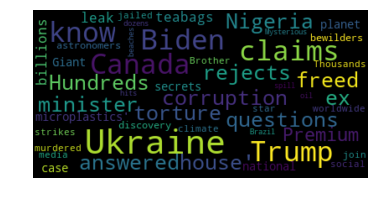

In [70]:
# importing requests package 
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
  
def NewsFromBBC(): 
     
    # BBC news api 
    main_url = " https://newsapi.org/v1/articles?source=bbc-news&country=in&sortBy=top&apiKey=6e115c94185740758f50c57ca53784b1"
  
    # fetching data in json format 
    open_bbc_page = requests.get(main_url).json() 
  
    # getting all articles in a string article 
    article = open_bbc_page["articles"] 
  
    # empty list which will  
    # contain all trending news 
    results = [] 
      
    for ar in article: 
        results.append(ar["title"]) 
          
    for i in range(len(results)): 
          
        # printing all trending news 
        print(i + 1, results[i])   

    # Create an empty string
    text_combined = ''
    # Loop through all the headlines and add them to 'text_combined' 
    for i in open_bbc_page['articles']:
        text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together
    # Print the first 300 characters to screen for inspection
    print(text_combined[0:300])

    wordcloud = WordCloud(max_font_size=40).generate(text_combined)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
  
# Driver Code 
if __name__ == '__main__': 
      
    # function call 
    NewsFromBBC()  



In [65]:
from lxml import html
import requests

requests=requests.Session()
# Send request to get the web page
response = requests.get('http://news.google.com')
#print(response.status_code)
# Check if the request succeeded (response code 200)
if (response.status_code == 200):
    # Parse the html from the webpage
    pagehtml = html.fromstring(response.text)
    # search for news headlines
    news = pagehtml.xpath('//h2[@class="esc-lead-article-title"] \
                      /a/span[@class="titletext"]/text()')

    # Print each news item in a new line
    print("\n".join(news))
    tf = open("headlines.txt", "w")

    tf.write("\n \n".join(news).lower())

    tf.close()
    # puts as lower case in text file named headlines

    with open('headlines.txt', 'r') as inF:
        for line in inF:
            if 'inflation' in line:
                 print ("\n" + "    " + line)
    # searches for 'inflation' (or whatever query) and prints in indented on a new line

In [11]:
import logging
import kiteconnect
from kiteconnect import KiteConnect
logging.basicConfig(level=logging.DEBUG)
kite = KiteConnect(api_key="sp9kkdub3kf8qufe&v=3")

In [52]:
kite.login_url()

NameError: name 'kite' is not defined

In [53]:
https://blog.datahut.co/scraping-yahoo-finance-data-using-python/

SyntaxError: invalid syntax (<ipython-input-53-13ee2a972afe>, line 1)

In [117]:
import requests
import logging
from bs4 import BeautifulSoup

logging.getLogger("requests").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)
logging.getLogger('requests').setLevel(logging.CRITICAL)
logging.getLogger('urllib3').setLevel(logging.CRITICAL)

url='https://finance.yahoo.com/'

header={
    'referer': 'https://finance.yahoo.com/',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
}

requests=requests.Session()
#r=requests.get(url, headers=header)
#r.content
#soup=BeautifulSoup(r.text, 'html5lib')
#result=soup.find_all('div', {'id':"fin-srch-assist"})
#print(result)
payload = {'query':'PNB.NS'}
s = requests.get('https://finance.yahoo.com/quote/PNB.NS?p=PNB.NS&.tsrc=fin-srch')
#print(s.text)

stocklist=['PNB.NS','NUTEK.NS', 'SMPL.NS','SMPL.NS']

stockname=[]
currentPrice=[]
changes=[]
changedatetime=[]

for stockid in stocklist:
    url = 'https://finance.yahoo.com/quote/%s?p=%s&.tsrc=fin-srch'%(stockid, stockid)
    print(url)
    r=requests.get(url)
    soup=BeautifulSoup(r.text, 'html5lib')
    stockname.append(stockid)
    for stocksearch in soup.find_all('div', attrs={'data-reactid':26}):
        soup1=stocksearch.find('span', attrs={'data-reactid':34})
        currentPrice.append(soup1.text)
        soup2=stocksearch.find('span', attrs={'data-reactid':35})
        changes.append(soup2.text)
        soup3=stocksearch.find('span', attrs={'data-reactid':37})
        changedatetime.append(soup3.text)
    
#pd.DataFrame({"Names": stockname, "Prices": currentPrice, "Change": changes, "% Change": changedatetime})

https://finance.yahoo.com/quote/PNB.NS?p=PNB.NS&.tsrc=fin-srch


AttributeError: 'NoneType' object has no attribute 'text'

In [150]:
import requests
import logging
from bs4 import BeautifulSoup

stocklist=['PNB.NS','NUTEK.NS', 'SMPL.NS','SMPL.NS']

stockname=[]
currentPrice=[]
changes=[]
changedatetime=[]

#url = 'https://finance.yahoo.com/quote/%s?p=%s&.tsrc=fin-srch'%(stockid, stockid)

url = 'https://finance.yahoo.com/quote/PNB.NS?p=PNB.NS&.tsrc=fin-srch'
print(url)

requests=requests.Session()
r=requests.get(url)
soup=BeautifulSoup(r.text, 'html5lib')
#print(soup.text)
for stocksearch in soup.find_all('div', attrs={'class':'My(6px) Pos(r) smartphone_Mt(6px)'}):
    #print(stocksearch)
    soup1=stocksearch.find('span', attrs={'data-reactid':14})
    currentPrice.append(soup1.text)
    soup2=stocksearch.find('span', attrs={'data-reactid':16})
    changes.append(soup2.text)
    soup3=stocksearch.find('span', attrs={'data-reactid':18})
    changedatetime.append(soup3.text)

pd.DataFrame({"Names": "PNB.NS", "Prices": currentPrice, "Change": changes, "Time": changedatetime})

https://finance.yahoo.com/quote/PNB.NS?p=PNB.NS&.tsrc=fin-srch


,Names,Prices,Change,Time
0,PNB.NS,62.85,+0.05 (+0.08%),At close: 3:30PM IST


In [51]:
import requests 
from bs4 import BeautifulSoup 
import csv 
import pandas as pd 

names=[]
prices=[]
changes=[]
percentChanges=[]
marketCaps=[]
totalVolumes=[]
circulatingSupplys=[]
 
for i in range(0,10):
    CryptoCurrenciesUrl = "https://in.finance.yahoo.com/cryptocurrencies?offset="+str(i)+"&amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;amp;count=50"
    r= requests.get(CryptoCurrenciesUrl)
    data=r.text
    up=BeautifulSoup(data)
for listg in soup.find_all('tr', attrs={'class':'SimpleDataTableRow'}):
    for name in listing.find_all('td', attrs={'aria-label':'Name'}):
        names.append(name.text)
        for price in listing.find_all('td', attrs={'aria-label':'Price (intraday)'}):
            prices.append(price.find('span').text)
        for change in listing.find_all('td', attrs={'aria-label':'Change'}):
            changes.append(change.text)
        for percentChange in listing.find_all('td', attrs={'aria-label':'% change'}):
            percentChanges.append(percentChange.text)
        for marketCap in listing.find_all('td', attrs={'aria-label':'Market cap'}):
            marketCaps.append(marketCap.text)
        for totalVolume in listing.find_all('td', attrs={'aria-label':'Total volume all currencies (24 hrs)'}):
            totalVolumes.append(totalVolume.text)
        for circulatingSupply in listing.find_all('td', attrs={'aria-label':'Circulating supply'}):
            circulatingSupplys.append(circulatingSupply.text)

In [47]:
#names
#prices
#changes
#percentChanges
#marketCaps
#totalVolumes
#circulatingSupplys
 

[]

In [81]:
names=[]
prices=[]
changes=[]
percentChanges=[]
marketCaps=[]
totalVolumes=[]
circulatingSupplys=[]
 
CryptoCurrenciesUrl = "https://in.finance.yahoo.com/currencies"
r= requests.get(CryptoCurrenciesUrl)
data=r.text
soup=BeautifulSoup(data)
 
counter = 40
for i in range(40, 404, 14):
    for listing in soup.find_all('tr', attrs={'data-reactid':i}):
        for name in listing.find_all('td', attrs={'data-reactid':i+3}):
            names.append(name.text)
        for price in listing.find_all('td', attrs={'data-reactid':i+4}):
            prices.append(price.text)
        for change in listing.find_all('td', attrs={'data-reactid':i+5}):
            changes.append(change.text)
        for percentChange in listing.find_all('td', attrs={'data-reactid':i+7}):
            percentChanges.append(percentChange.text)
pd.DataFrame({"Names": names, "Prices": prices, "Change": changes, "% Change": percentChanges})

,Names,Prices,Change,% Change
0,USD/INR,70.6400,+0.1480,+0.2100%
1,EUR/INR,77.1408,0.0000,0.00%
2,GBP/INR,86.7779,+0.1696,+0.20%
3,AED/INR,19.1870,+0.0380,+0.20%
4,INR/JPY,1.5279,0.0000,0.00%
5,SGD/INR,51.1350,+0.1000,+0.20%
6,USD/IDR,"14,160.0000",0.0000,0.0000%
7,USD/THB,30.5900,0.0000,0.0000%
8,USD/MYR,4.1860,0.0000,0.0000%
9,USD/ZAR,15.1513,0.0000,0.0000%


In [160]:
https://pypi.org/project/yahoo-finance/

SyntaxError: invalid syntax (<ipython-input-160-a74bc2b4fb8f>, line 1)

In [6]:
from yahoo_finance import Share

yahoo = Share('YHOO')
#yahoo.get_open()
#yahoo.refresh()
yahoo

URLError: <urlopen error [Errno 11001] getaddrinfo failed>